## Importar Librerías Necesarias

```markdown
Se importan las librerías y funciones necesarias para la implementación de las distintas tareas a realizar durante el proyecto de análisis
```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
project_dataframe = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print(project_dataframe.head())
print(project_dataframe.info())
print(project_dataframe.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [ ]:
numeric_variables = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

project_dataframe[numeric_variables] = project_dataframe[numeric_variables].fillna(project_dataframe[numeric_variables].median())

nominal_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

project_dataframe[nominal_variables] = project_dataframe[nominal_variables].fillna(project_dataframe[nominal_variables].mode().iloc[0])

In [ ]:
#label_encoders = {}
#
#nominal_variables.append('NObeyesdad')
#
#for columns in nominal_variables:
#    label_encoder = LabelEncoder()
#    project_dataframe[columns] = label_encoder.fit_transform(project_dataframe[columns])  # Transformar la columna en numérica
#    label_encoders[columns] = label_encoder
#
print(project_dataframe.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [2]:
for column in project_dataframe.select_dtypes(include=['number']):
    plt.figure()
    project_dataframe[column].plot(kind='hist', bins=20, title=column)
    plt.show()

print(project_dataframe.info())
print('\n')
print(project_dataframe.describe())

label_encoders = {}

nominal_variables = 'NObeyesdad'

for columns in nominal_variables:
    label_encoder = LabelEncoder()
    project_dataframe[columns] = label_encoder.fit_transform(project_dataframe[columns])  # Transformar la columna en numérica
    label_encoders[columns] = label_encoder

plt.figure()
project_dataframe[column].plot(kind='hist', bins=20, title=column)
plt.show()


NameError: name 'project_dataframe' is not defined

Quitar outliners. Al comprobar los outliners encontramos que no hay nada importante que objetar, por lo que lo dejamos tal cual.

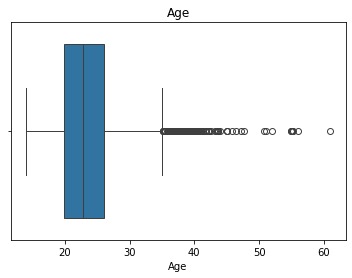

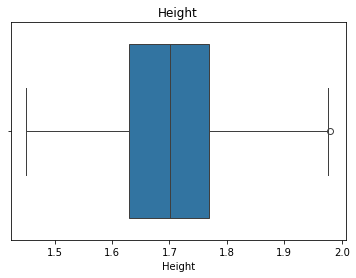

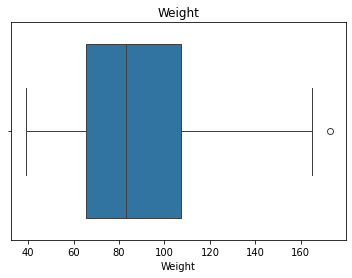

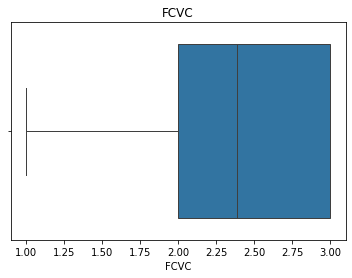

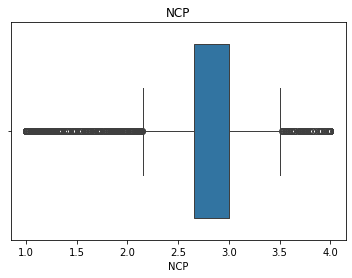

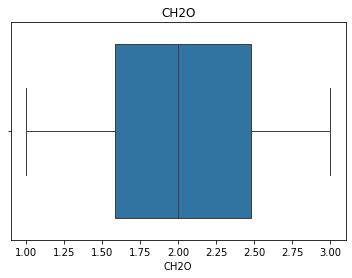

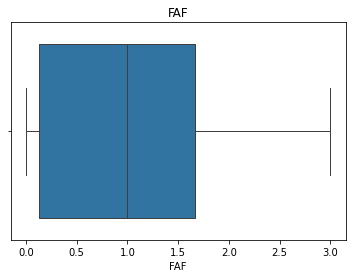

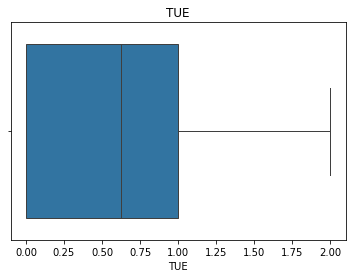

In [ ]:
for column in project_dataframe.select_dtypes(include=[np.number]):
    plt.figure()
    sns.boxplot(x=project_dataframe[column])
    plt.title(column)
    plt.show()

## Gestion de los valores nulos

```markdown
Si tras el proceso de transformación de los datos, balanceo y tratamiento de outliers, se encuentra algún valor nulo, al ya ser todas las variables de tipo numérico, rellenamos los valores restantes según la mediana.
```

In [ ]:
print(project_dataframe.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


```markdown
Observamos que no existen valores nulos por lo que no es necesario el tratamiento de estos.
```

## Gestionamos la división de las clases en predictoras y objetivo

In [ ]:
predict_variables = project_dataframe.drop('NObeyesdad', axis=1)
target_variable = project_dataframe['NObeyesdad']

# División en conjunto de entrenamiento(70%) y prueba(30%)
predict_variables_train, predict_variables_test, target_variable_train, target_variable_test = train_test_split(predict_variables, target_variable, test_size=0.3, random_state=42)

## Gestionamos el desbalanceo de las clases

In [ ]:
# comprobar que tengan la misma cantidad de columnas
print("Distribución de clases antes de SMOTE:")
print(target_variable_train.value_counts())

smote = SMOTE()
predict_variables_train, target_variable_train = smote.fit_resample(predict_variables_train, target_variable_train)

# comprobar que tengan la misma cantidad de columnas
print("Distribución de clases después de SMOTE:")
print(target_variable_train.value_counts())

Distribución de clases antes de SMOTE:
NObeyesdad
Obesity_Type_I         249
Obesity_Type_III       226
Overweight_Level_II    211
Obesity_Type_II        209
Overweight_Level_I     202
Normal_Weight          194
Insufficient_Weight    186
Name: count, dtype: int64


NameError: name 'SMOTE' is not defined